<a href="https://colab.research.google.com/github/MuhammadKhoirulMustaqim010/Depresion_Dataset/blob/main/depression_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pandas: Digunakan untuk manipulasi dan analisis data berbasis tabel
(dataframe).
Memungkinkan pembacaan, penulisan, dan pemrosesan data dari berbagai format seperti CSV, Excel, SQL, JSON, dll.

matplotlib.pyplot: Library untuk membuat visualisasi data dalam bentuk grafik dan plot.
Digunakan untuk menggambar grafik garis, batang, scatter plot, histogram, dll.

seaborn: Library visualisasi berbasis Matplotlib yang lebih interaktif dan mudah digunakan.
Menyediakan grafik statistik seperti heatmap, boxplot, violin plot, dll.

numpy: Library untuk komputasi numerik yang efisien menggunakan array multidimensi.
Memungkinkan operasi matematika seperti perhitungan statistik, aljabar linear, transformasi Fourier, dll.

sklearn.preprocessing.LabelEncoder: Library untuk mengubah data kategorikal menjadi angka agar bisa digunakan dalam model ML.


## Menampilkan data ##

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MuhammadKhoirulMustaqim010/Depresion_Dataset/refs/heads/main/depression_dataset.csv')
df

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [3]:
# Menampilkan 5 data teratas
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


## Menghitung Statistik Deskriptif ##

In [4]:
# Menampilkan statistik deskriptif dari DataFrame.
df.describe(include="all")

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,2556,2556,2556.000000,2556,2556,1883,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556,2556,2556,2556,2556.000000,2556.000000,2556,2556
unique,216,2,NaN,30,2,35,NaN,NaN,NaN,NaN,NaN,4,3,27,2,NaN,NaN,2,2
top,Tushar,Male,NaN,Srinagar,Working Professional,Teacher,NaN,NaN,NaN,NaN,NaN,7-8 hours,Unhealthy,Class 12,No,NaN,NaN,No,No
freq,26,1333,NaN,102,2054,322,NaN,NaN,NaN,NaN,NaN,658,882,275,1307,NaN,NaN,1311,2101
mean,NaN,NaN,39.043036,NaN,NaN,NaN,3.003984,3.021908,7.567809,3.075697,3.015093,NaN,NaN,NaN,NaN,6.023865,2.968701,NaN,NaN
std,NaN,NaN,12.260596,NaN,NaN,NaN,1.390007,1.417312,1.465367,1.373490,1.418432,NaN,NaN,NaN,NaN,3.771743,1.415527,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,1.000000,5.030000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,28.000000,NaN,NaN,NaN,2.000000,2.000000,6.210000,2.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,39.000000,NaN,NaN,NaN,3.000000,3.000000,7.605000,3.000000,3.000000,NaN,NaN,NaN,NaN,6.000000,3.000000,NaN,NaN
75%,NaN,NaN,50.000000,NaN,NaN,NaN,4.000000,4.000000,8.825000,4.000000,4.000000,NaN,NaN,NaN,NaN,9.000000,4.000000,NaN,NaN


## Menampilkan Tipe Data ##

In [5]:
print("Informasi Dataset:")
# Menampilkan tipe data setiap kolom
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null 

 **Hasil yang diperoleh:**

1.   terdapat nilai kosong di work pressure dan academic pressure yang kemungkinanan dapat digabungkan karena pekerjanya berjumlah 2054 sedangkan pelajarnya 502 sesuai dengan kolom yang hilang
2.   terdapat nilai kosong di Study Safistaction dan Job Satisfaction yang kemungkinanan dapat digabungkan karena pekerjanya berjumlah 2054 sedangkan pelajarnya 502 sesuai dengan kolom yang hilang
3. 502 data CGPA merupakan Pelajar jadi tidak ada missing value disitu

In [6]:
df["Pressure"] = df["Academic Pressure"].fillna(df["Work Pressure"])

# Menentukan sumber stres
def get_source(row):
    if pd.notna(row["Academic Pressure"]) and pd.notna(row["Work Pressure"]):
        return "Both"
    elif pd.notna(row["Academic Pressure"]):
        return "Academic"
    elif pd.notna(row["Work Pressure"]):
        return "Work"
    else:
        return "Unknown"

df["Pressure Source"] = df.apply(get_source, axis=1)
display(df["Pressure Source"].head())

,Pressure Source
0,Work
1,Work
2,Work
3,Work
4,Work


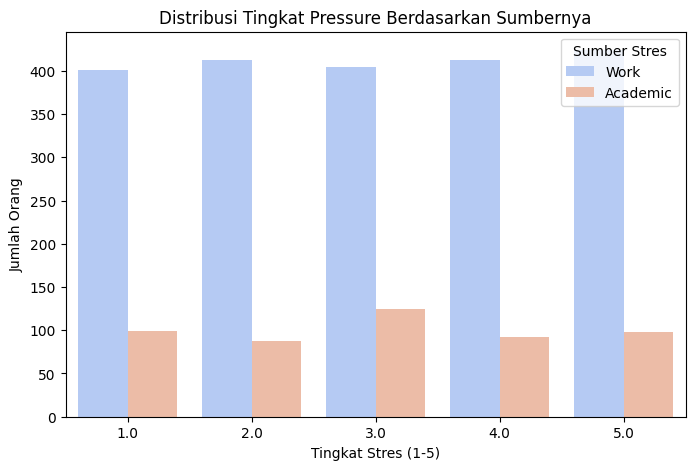

In [7]:
#Visualisasi Distribusi Tingkat Stres ---
plt.figure(figsize=(8,5))
sns.countplot(x="Pressure", hue="Pressure Source", data=df, palette="coolwarm")
plt.title("Distribusi Tingkat Pressure Berdasarkan Sumbernya")
plt.xlabel("Tingkat Stres (1-5)")
plt.ylabel("Jumlah Orang")
plt.legend(title="Sumber Stres")
plt.show()

In [8]:
# Menghapus kolom lama
df.drop(columns=["Academic Pressure", "Work Pressure"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   CGPA                                   502 non-null    float64
 7   Study Satisfaction                     502 non-null    float64
 8   Job Satisfaction                       2054 non-null   float64
 9   Sleep Duration                         2556 non-null   object 
 10  Dietary Habits                         2556 non-null   object 
 11  Degr

In [9]:
df["Satisfaction"] = df["Job Satisfaction"].fillna(df["Study Satisfaction"])

# Menentukan sumber
def get_source(row):
    if pd.notna(row["Study Satisfaction"]) and pd.notna(row["Job Satisfaction"]):
        return "Both"
    elif pd.notna(row["Study Satisfaction"]):
        return "Study"
    elif pd.notna(row["Job Satisfaction"]):
        return "Job"
    else:
        return "Unknown"

df["Satisfaction Source"] = df.apply(get_source, axis=1)
df["Satisfaction Source"].head()

,Satisfaction Source
0,Job
1,Job
2,Job
3,Job
4,Job


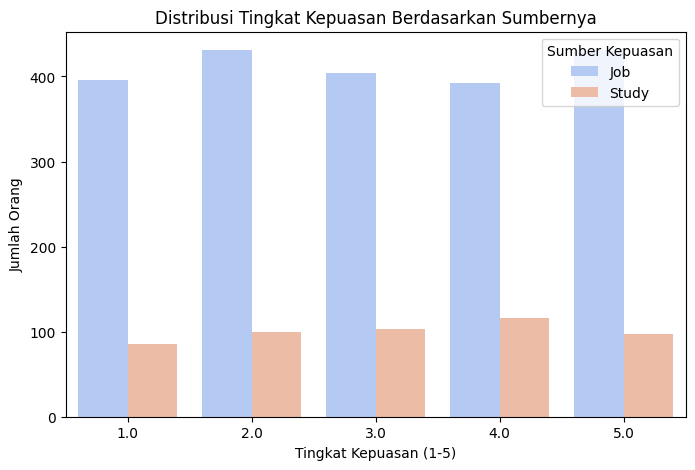

In [10]:
#Visualisasi
plt.figure(figsize=(8,5))
sns.countplot(x="Satisfaction", hue="Satisfaction Source", data=df, palette="coolwarm")
plt.title("Distribusi Tingkat Kepuasan Berdasarkan Sumbernya")
plt.xlabel("Tingkat Kepuasan (1-5)")
plt.ylabel("Jumlah Orang")
plt.legend(title="Sumber Kepuasan")
plt.show()

In [11]:
# Menghitung jumlah rating 1 berdasarkan sumber satisfaction
count_per_source = df[df["Satisfaction"] == 1]["Satisfaction Source"].value_counts()

print(count_per_source)


Satisfaction Source
Job      396
Study     86
Name: count, dtype: int64


In [12]:
# Menghitung jumlah rating 1 berdasarkan sumber pressure
count_per_source = df[df["Pressure"] == 1]["Pressure Source"].value_counts()

print(count_per_source)


Pressure Source
Work        401
Academic     99
Name: count, dtype: int64


In [13]:
# Menghapus kolom lama
df.drop(columns=["Study Satisfaction", "Job Satisfaction"], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   CGPA                                   502 non-null    float64
 7   Sleep Duration                         2556 non-null   object 
 8   Dietary Habits                         2556 non-null   object 
 9   Degree                                 2556 non-null   object 
 10  Have you ever had suicidal thoughts ?  2556 non-null   object 
 11  Work

In [15]:
# Menghitung jumlah baris duplikat
print("Jumlah baris duplikat:")
df.duplicated().sum()

Jumlah baris duplikat:


np.int64(0)

## Mencari Missing Value ##

## Menampilkan nilai hilang di setiap kolom ##


In [16]:
print("Cek Missing Values:")
df.isnull().sum()

Cek Missing Values:


,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,673
CGPA,2054
Sleep Duration,0
Dietary Habits,0
Degree,0


In [17]:
# Cek jumlah Student dan Professional
print(df["Working Professional or Student"].value_counts())

# Cek jumlah data yang hilang di kolom "Profession"
print(f"\nJumlah missing values di 'Profession': {df['Profession'].isna().sum()}")

Working Professional or Student
Working Professional    2054
Student                  502
Name: count, dtype: int64

Jumlah missing values di 'Profession': 673


In [18]:
# Cek apakah ada Student yang memiliki nilai di "Profession" (artinya bekerja)
students_with_jobs = df[(df["Working Professional or Student"] == "Student") & df["Profession"].notna()]
print(f"\nJumlah Student yang memiliki pekerjaan: {students_with_jobs.shape[0]}")

# Cek apakah ada Professional yang tidak memiliki "Profession"
professionals_without_jobs = df[(df["Working Professional or Student"] == "Working Professional") & df["Profession"].isna()]
print(f"\nJumlah Professional yang tidak mengisi 'Profession': {professionals_without_jobs.shape[0]}")


Jumlah Student yang memiliki pekerjaan: 0

Jumlah Professional yang tidak mengisi 'Profession': 171


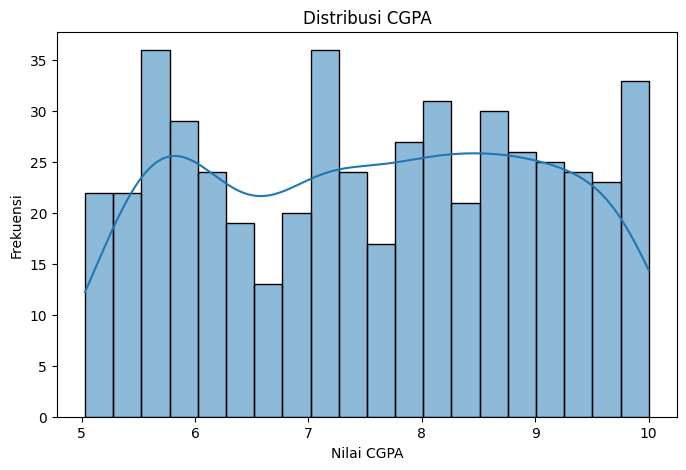

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CGPA"], bins=20, kde=True)  # NaN akan diabaikan otomatis
plt.title("Distribusi CGPA")
plt.xlabel("Nilai CGPA")
plt.ylabel("Frekuensi")
plt.show()

In [20]:
# Menghitung rata-rata CGPA hanya untuk kategori "Study"
mean_cgpa = df[df["Satisfaction Source"] == "Study"]["CGPA"].mean()

# Mengisi nilai kosong pada CGPA hanya untuk pelajar
df.loc[(df["Satisfaction Source"] == "Study") & (df["CGPA"].isna()), "CGPA"] = mean_cgpa

## Menampilkan Jumlah nilai hilang dan presentase nilai hilang ##

In [21]:
print("Jumlah Missing Values:")
print(df.isnull().sum().sum())

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase nilai hilang per kolom:")
print(missing_percentage)

Jumlah Missing Values:
2727

Persentase nilai hilang per kolom:
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.330203
CGPA                                     80.359937
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
Pressure                                  0.000000
Pressure Source                           0.000000
Satisfaction                              0.000000
Satisfaction Sourc

In [22]:
#Periksa apakah semua nilai dalam kolom Name unik.
df.Name.is_unique

False

## Visualisasi Distribusi Data ##

<Figure size 2000x1000 with 0 Axes>

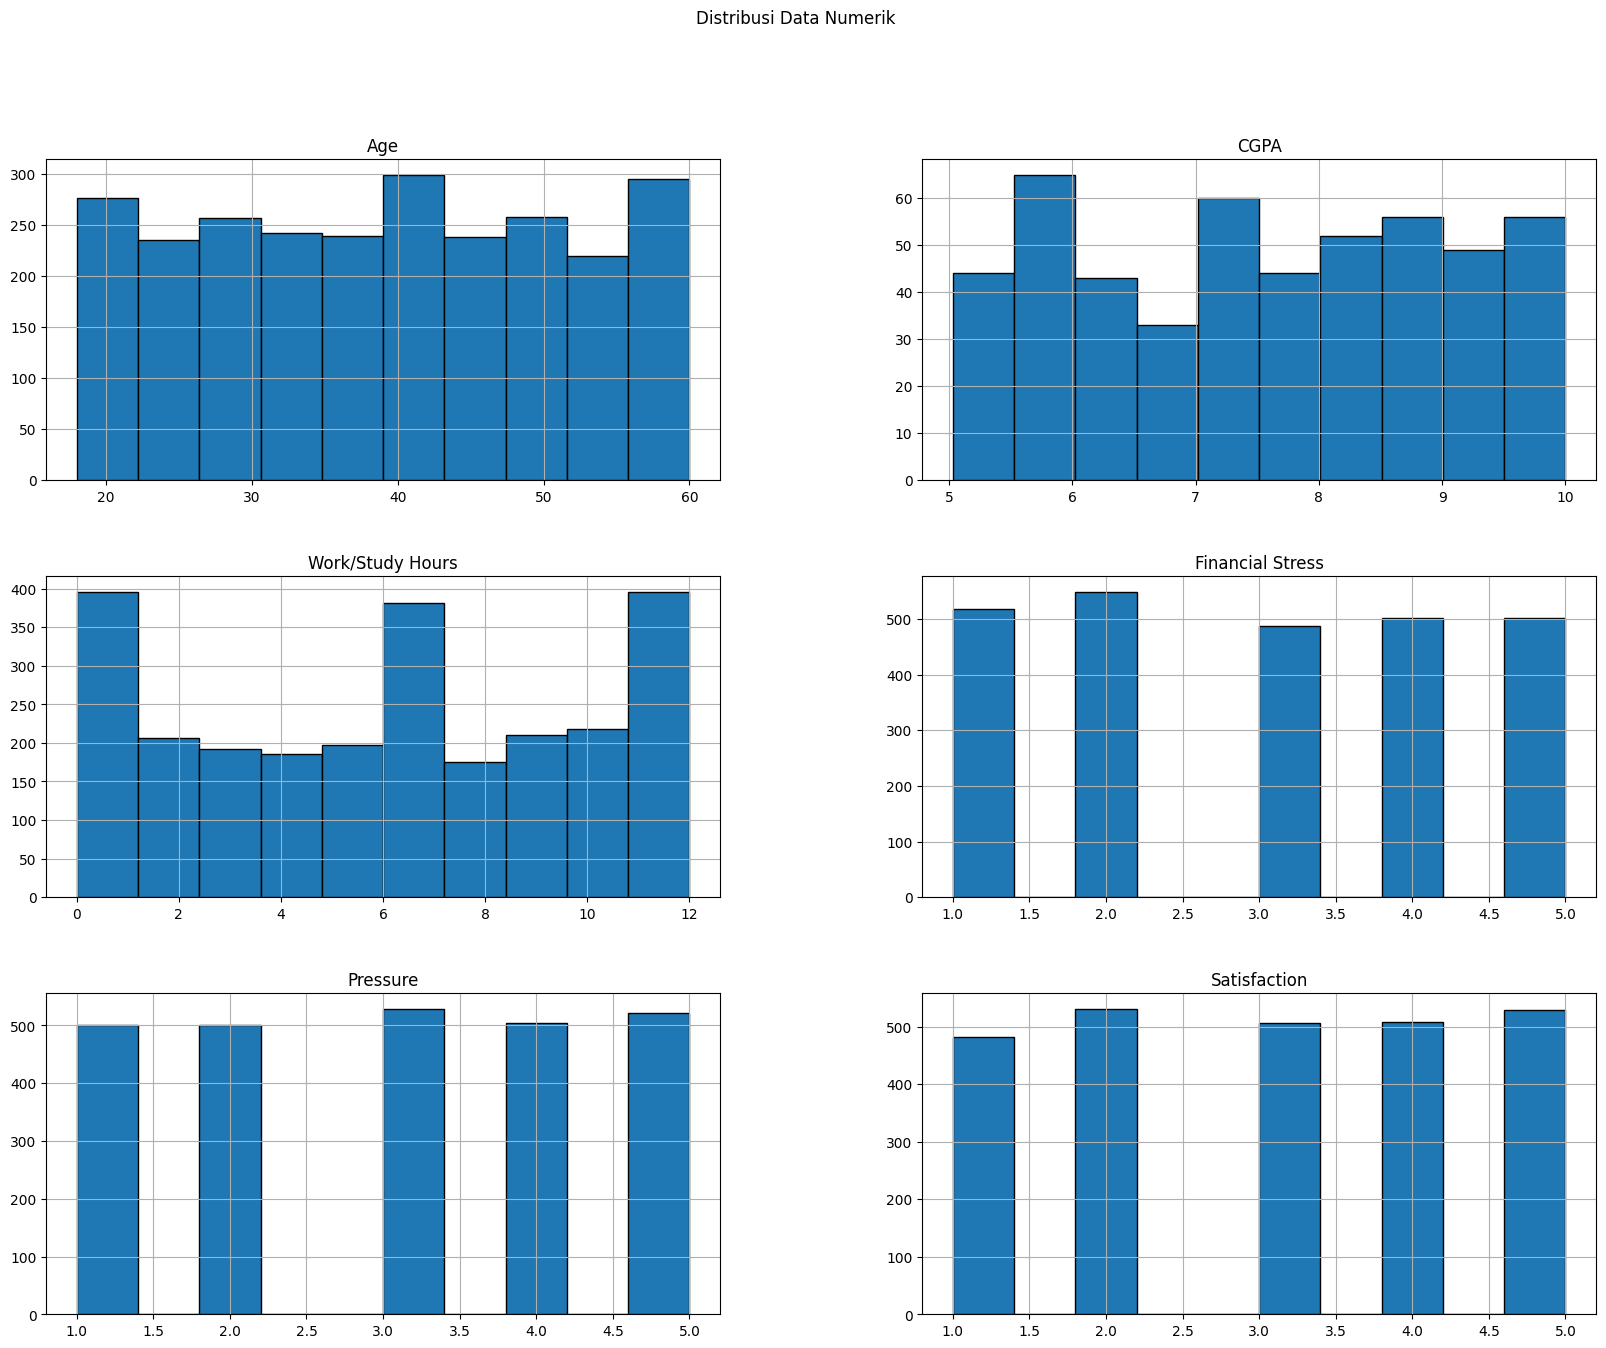

In [23]:
# Visualisasi distribusi data numerik
plt.figure(figsize=(20, 10))
df.hist(figsize=(20, 15), bins=10, edgecolor='black')
plt.suptitle("Distribusi Data Numerik")
plt.show()

In [24]:
# Encoding variabel kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = label_encoder.fit_transform(df[col])

print("\n Dataset Setelah Encoding:")
print(df.head())


 Dataset Setelah Encoding:
   Name  Gender  Age  City  Working Professional or Student  Profession  CGPA  \
0   128       0   37     7                                1          32   NaN   
1   143       1   60    11                                1          16   NaN   
2   102       0   42     3                                1          32   NaN   
3    67       0   44    25                                1          32   NaN   
4     5       1   48     9                                1          34   NaN   

   Sleep Duration  Dietary Habits  Degree  \
0               1               1      18   
1               0               2       1   
2               0               1      14   
3               1               0      22   
4               1               1       8   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0                 6                 2   
1                                      1              

In [25]:
# Menghitung jumlah orang yang mengalami depresi berdasarkan kategori Pressure Source
count_depression = df[df["Depression"] == 1]["Pressure Source"].value_counts()

print(count_depression)
# Menghitung jumlah orang yang tidak mengalami depresi berdasarkan kategori Pressure Source
count_Nodepression = df[df["Depression"] == 0]["Pressure Source"].value_counts()

print(count_Nodepression)

Pressure Source
0    252
1    203
Name: count, dtype: int64
Pressure Source
1    1851
0     250
Name: count, dtype: int64


**Hal yang didapatkan :**


1.   dari 502 siswa terdapat 252 mahasiswa yang terkena depresi
2.   dari 2054 pekerja terdapat 203 pekerja yang mengalami depresi



## Mengecek Outlier ##

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df < lower_bound) | (df > upper_bound)]
print(outliers)

      Name  Gender  Age  City  Working Professional or Student  Profession  \
0      NaN     NaN  NaN   NaN                              NaN         NaN   
1      NaN     NaN  NaN   NaN                              NaN         NaN   
2      NaN     NaN  NaN   NaN                              NaN         NaN   
3      NaN     NaN  NaN   NaN                              NaN         NaN   
4      NaN     NaN  NaN   NaN                              NaN         NaN   
...    ...     ...  ...   ...                              ...         ...   
2551   NaN     NaN  NaN   NaN                              NaN         NaN   
2552   NaN     NaN  NaN   NaN                              NaN         NaN   
2553   NaN     NaN  NaN   NaN                              NaN         NaN   
2554   NaN     NaN  NaN   NaN                              NaN         NaN   
2555   NaN     NaN  NaN   NaN                              0.0         NaN   

      CGPA  Sleep Duration  Dietary Habits  Degree  \
0      Na

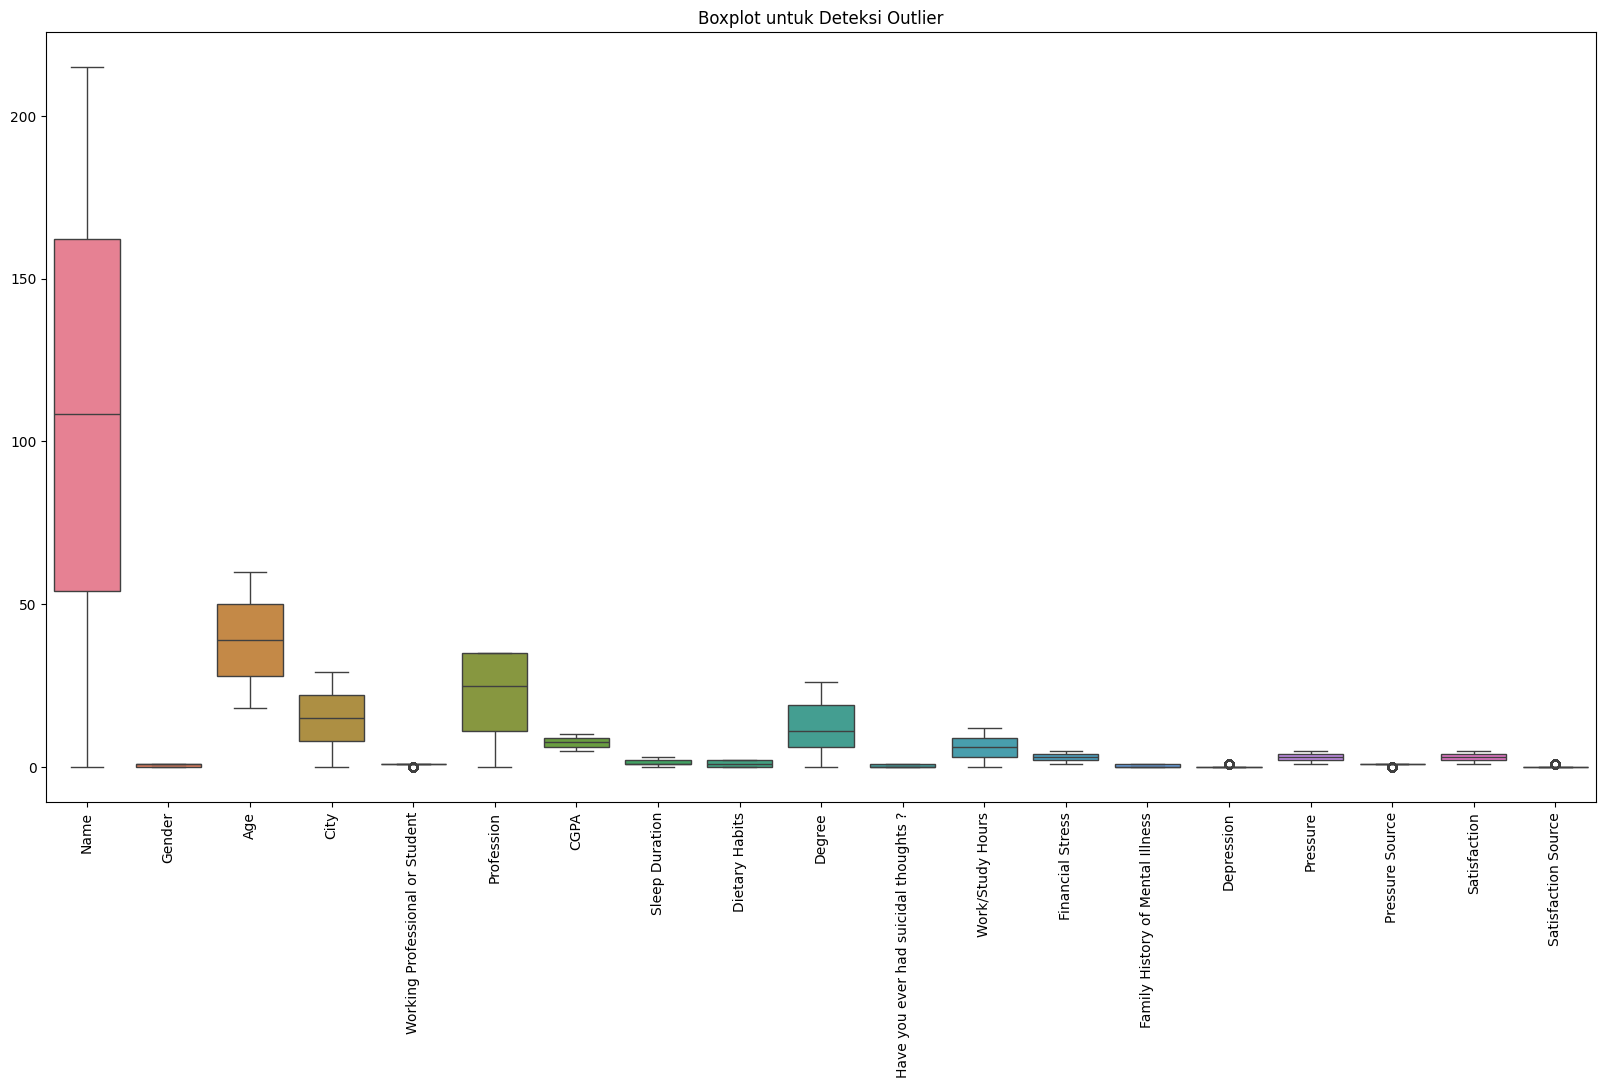

In [27]:
# Identifikasi outlier menggunakan boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

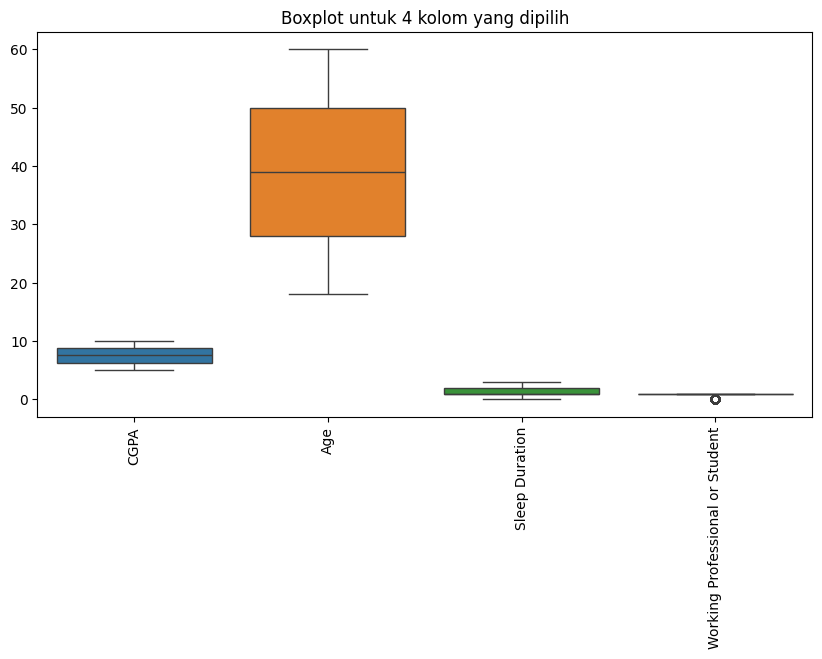

In [28]:
# Pilih kolom yang ingin ditampilkan
selected_columns1 = ["CGPA", "Age", "Sleep Duration", "Working Professional or Student"]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_columns1])
plt.xticks(rotation=90)
plt.title("Boxplot untuk 4 kolom yang dipilih")
plt.show()

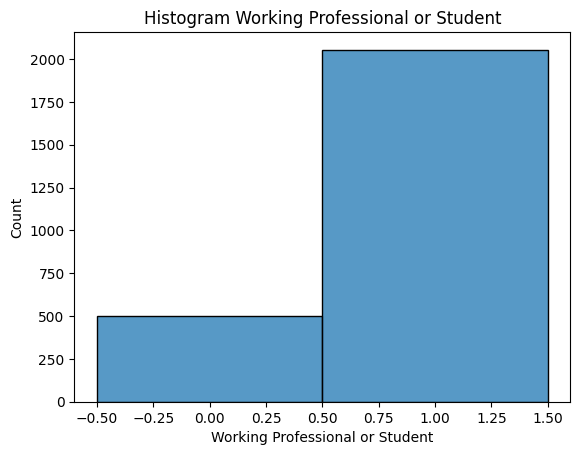

In [29]:
sns.histplot(df["Working Professional or Student"], bins=2, discrete=True, kde=False)
plt.title("Histogram Working Professional or Student")
plt.show()

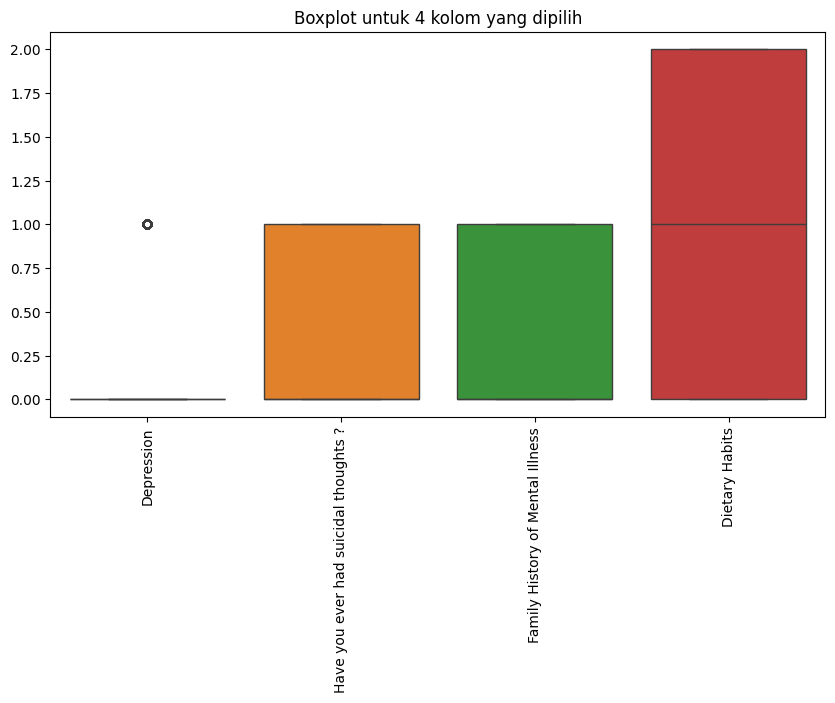

In [30]:
# Pilih kolom yang ingin ditampilkan
selected_columns2 = ["Depression", "Have you ever had suicidal thoughts ?",
                     "Family History of Mental Illness", "Dietary Habits"]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[selected_columns2])
plt.xticks(rotation=90)
plt.title("Boxplot untuk 4 kolom yang dipilih")
plt.show()

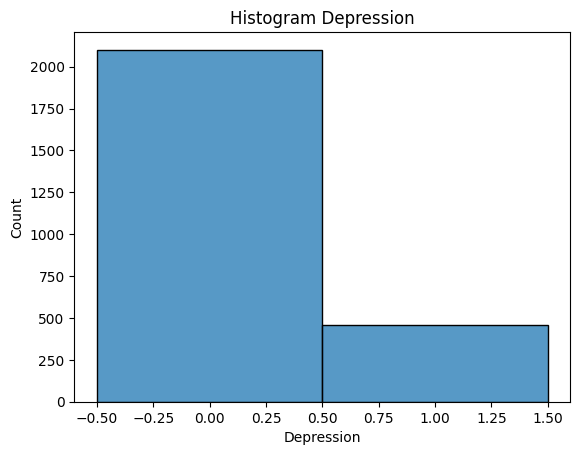

In [31]:
sns.histplot(df["Depression"], bins=2, discrete=True, kde=False)
plt.title("Histogram Depression")
plt.show()

Setelah melakukan pengecekan terbukti bahwa tidak ada outliner di dalam dataset ini boxplot diatas mendeteksi outliner karena perbedaan data yang signifikat jumlahnya

## Eksplorasi data lainnya ##

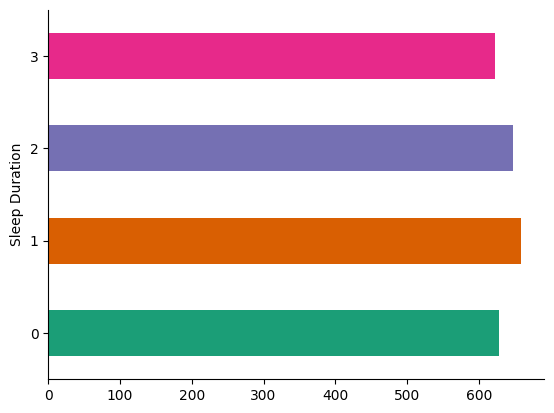

In [32]:
df.groupby('Sleep Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

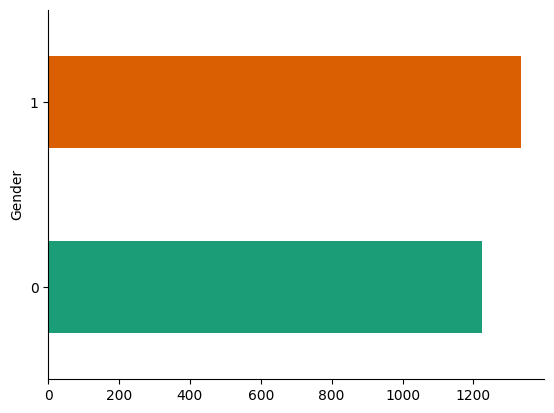

In [33]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

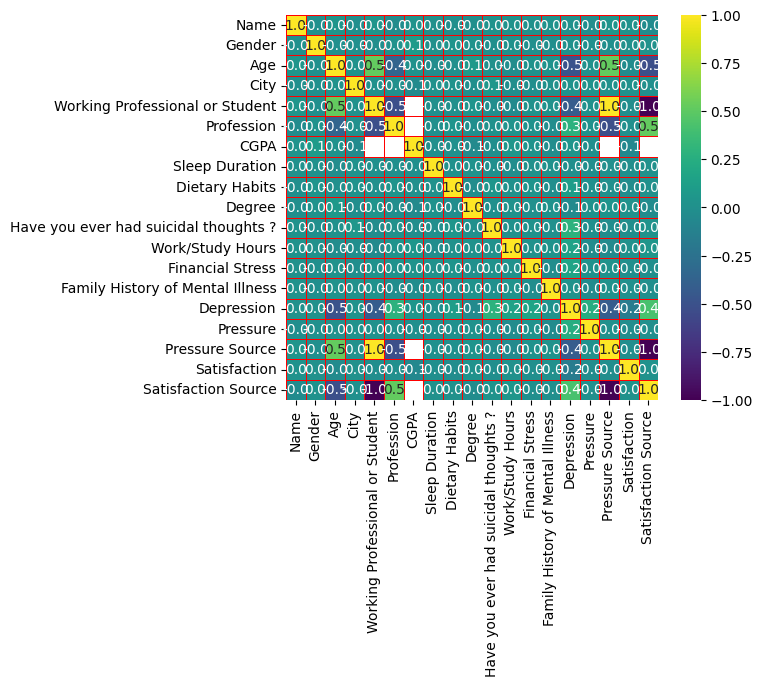

In [34]:
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   int64  
 1   Gender                                 2556 non-null   int64  
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   int64  
 4   Working Professional or Student        2556 non-null   int64  
 5   Profession                             2556 non-null   int64  
 6   CGPA                                   502 non-null    float64
 7   Sleep Duration                         2556 non-null   int64  
 8   Dietary Habits                         2556 non-null   int64  
 9   Degree                                 2556 non-null   int64  
 10  Have you ever had suicidal thoughts ?  2556 non-null   int64  
 11  Work

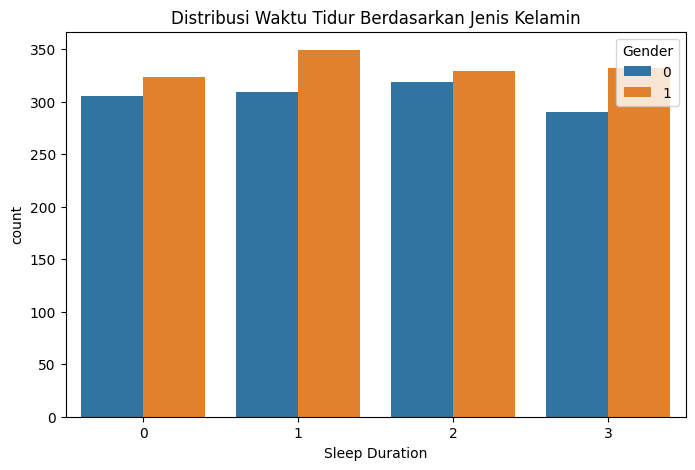

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sleep Duration', hue='Gender', data=df)
plt.xticks(rotation=0)
plt.title("Distribusi Waktu Tidur Berdasarkan Jenis Kelamin")
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
table = pd.crosstab(df['Sleep Duration'], df['Gender'], normalize='index') * 100
print(table)

Pada dataset di atas, dilakukan prepocessing yaitu:
- Mengisi nilai null Akademic Pressure dan Job Pressure dengan membuat kolom baru lalu menghapus kolom Akademic Pressure dan Job Pressure.
-Mengisi nilai null Study Satisfaction dan Job Satisfaction dengan membuat kolom baru lalu menghapus kolom Study Satisfaction dan Job Satisfaction.
- Mengubah nilai kategorikal menjadi numerik
- Melakukan standarisasi untuk setiap kolom numerik
- Melakukan feature engineering yaitu membuat kolom baru berdasarkan kolom-kolom yang sudah ada
- Membuat visualisasi distribusi nilai kolom


## Standarisasi (Z-Score) pada data Numerik ##

In [ ]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi hanya untuk kolom numerik
df_standardized = df.copy()
df_standardized[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['number']).columns])

# Menampilkan hasil
print(df_standardized.head())


# Model Regresi

In [ ]:
columns = df.columns

In [ ]:
#mengecek nama tiap kolom
columns[:]

In [ ]:
columns = df.drop(["Name", "CGPA"], axis=1)
columns.info()

In [ ]:
X = columns.drop(["Depression"], axis=1)
y = columns["Depression"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Print Akurasi
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

In [ ]:
# Classification Report untuk model terbaik
best_model = max([(accuracy_dt, "Decision Tree"), (accuracy_rf, "Random Forest"), (accuracy_svm, "SVM")], key=lambda x: x[0])
print(f"Best Model: {best_model[1]} with Accuracy: {best_model[0]:.2f}")

# Confusion Matrix untuk model terbaik
if best_model[1] == "Decision Tree":
    best_pred = y_pred_dt
elif best_model[1] == "Random Forest":
    best_pred = y_pred_rf
else:
    best_pred = y_pred_svm

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model[1]}")
plt.show()

In [ ]:
# Evaluasi Model
precision = precision_score(y_test, best_pred)
recall = recall_score(y_test, best_pred)
specificity = confusion_matrix(y_test, best_pred)[0, 0] / (confusion_matrix(y_test, best_pred)[0, 0] + confusion_matrix(y_test, best_pred)[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")